## **Diamonds Prices**

In [81]:
import pandas as pd
df = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

attributes = df.columns
for attribute in attributes:
    print(attribute)
    

Unnamed: 0
carat
cut
color
clarity
depth
table
price
x
y
z


#### **Бизнес-цели**

**1. Определение цены алмаза на основе его характеристик**

**Бизнес-цель:** Разработать модель, которая позволяет прогнозировать цену алмаза на основе его характеристик (таких как карат, чистота, цвет и огранка).

**Техническая цель:** Создать и обучить модель машинного обучения, которая принимает на вход параметры алмаза и выдает предсказанную цену. Цель — минимизация ошибки предсказания.

**2. Классификация качества алмаза на основе характеристик**

**Бизнес-цель:** Определить качество алмаза (например, высокая, средняя, низкая) на основе его характеристик для автоматической сортировки.

**Техническая цель:** Создать модель классификации, которая принимает на вход характеристики алмаза и присваивает ему категорию качества. Цель — максимизация точности классификации.

#### **Подготовка данных**

In [68]:
import numpy as np

# Проверка на пропущенные значения
missing_data = df.isnull().sum()
print("Пропущенные данные по каждому столбцу:")
print(missing_data)

Пропущенные данные по каждому столбцу:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


Пропущенных значений не найдено

#### **Разбиение каждого набора данных на обучающую, контрольную и тестовую выборки**

Размеры выборок:
Обучающая выборка: 32365 записей
Валидационная выборка: 10789 записей
Тестовая выборка: 10789 записей


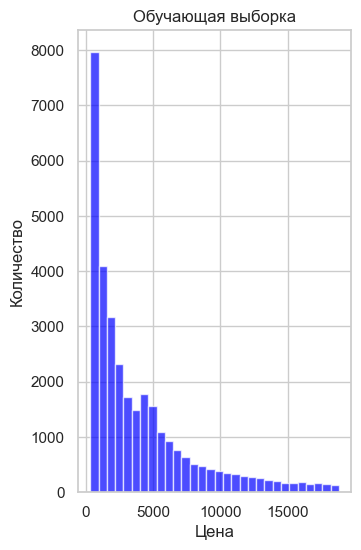

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Разделение признаков (features) и целевой переменной (target)
X = df.drop(columns=['price'])  # Признаки (все столбцы, кроме 'price')
y = df['price']  # Целевая переменная (цена)

# Разбиение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Валидационная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

# Визуализация распределения цен в каждой выборке
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Обучающая выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.show()

Данные не сбалансированы, так как существует большая разница в количестве наблюдений для разных диапазонов цен. Это может привести к тому, что модель будет хуже предсказывать цены для более дорогих алмазов, так как таких данных меньше. Применим методы приращения.

Размеры выборок:
Обучающая выборка: 32365 записей
Валидационная выборка: 10789 записей
Тестовая выборка: 10789 записей


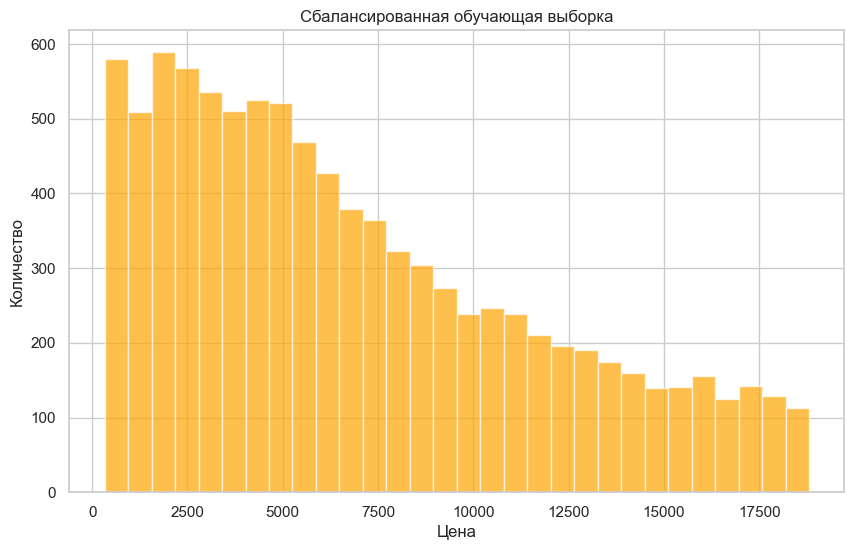

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Разделение признаков (features) и целевой переменной (target)
X = df.drop(columns=['price'])  # Признаки (все столбцы, кроме 'price')
y = df['price']  # Целевая переменная (цена)

# Применение one-hot encoding для категориальных признаков
X = pd.get_dummies(X, drop_first=True)

# Разбиение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Валидационная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

# Применение RandomUnderSampler для уменьшения размеров больших классов
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Применение SMOTE для увеличения сбалансированности
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_undersampled, y_undersampled)

# Визуализация распределения цен в сбалансированной выборке
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=30, color='orange', alpha=0.7)
plt.title('Сбалансированная обучающая выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()


Теперь данные намного более сбаланчированные.

#### **Конструировании признаков**

1. Унитарное кодирование категориальных признаков (One-Hot Encoding)

Унитарное кодирование уже было пременено. Выведем имеющиеся столбцы

In [84]:
import pandas as pd
df1 = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

print("Данные до унитарного кодирования:")
print(df1.head())

# Применение унитарного кодирования для категориальных признаков
df_encoded = pd.get_dummies(df1, drop_first=True)

print("\nДанные после унитарного кодирования:")
print(df_encoded.head())

Данные до унитарного кодирования:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

Данные после унитарного кодирования:
   Unnamed: 0  carat  depth  table  price     x     y     z  cut_Good  \
0           1   0.23   61.5   55.0    326  3.95  3.98  2.43     False   
1           2   0.21   59.8   61.0    326  3.89  3.84  2.31     False   
2           3   0.23   56.9   65.0    327  4.05  4.07  2.31      True   
3           4   0.29   62.4   58.0    334  4.20  4.23  2.63     False   
4           5   0.31  

Видим что данные изменились.

2. Дискретизация числовых признаков


In [86]:
import pandas as pd
df1 = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

print("Данные до дискретизации:")
print(df1.head())

bins = [0, 5000, 10000, 15000, 20000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k']
df1['price_bins'] = pd.cut(df1['price'], bins=bins, labels=labels, right=False)

print("\nДанные после дискретизации:")
print(df1[['price', 'price_bins']].head())


Данные до дискретизации:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

Данные после дискретизации:
   price price_bins
0    326       0-5k
1    326       0-5k
2    327       0-5k
3    334       0-5k
4    335       0-5k


Видим, что данные изменились.

#### 3. «Ручной» синтез признаков

In [89]:
import pandas as pd

# Загрузка данных
df1 = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Проверка первых строк данных
print("Данные до синтеза признака:")
print(df1.head())

# Создание нового признака 'price_per_carat' (цена за караты)
df1['price_per_carat'] = df1['price'] / df1['carat']

# Проверка первых строк данных после синтеза признака
print("\nДанные после синтеза признака 'price_per_carat':")
print(df1[['price', 'carat', 'price_per_carat']].head())


Данные до синтеза признака:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

Данные после синтеза признака 'price_per_carat':
   price  carat  price_per_carat
0    326   0.23      1417.391304
1    326   0.21      1552.380952
2    327   0.23      1421.739130
3    334   0.29      1151.724138
4    335   0.31      1080.645161


#### 4. масштабирование признаков на основе нормировки и стандартизации.


In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df1 = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Создание нового признака 'price_per_carat' (цена за караты)
df1['price_per_carat'] = df1['price'] / df1['carat']

# Проверка первых строк данных до масштабирования
print("Данные до масштабирования:")
print(df1[['price', 'carat', 'price_per_carat']].head())

# Масштабирование признаков на основе нормировки
min_max_scaler = MinMaxScaler()
df1[['price', 'carat', 'price_per_carat']] = min_max_scaler.fit_transform(df1[['price', 'carat', 'price_per_carat']])

# Проверка первых строк данных после нормировки
print("\nДанные после нормировки:")
print(df1[['price', 'carat', 'price_per_carat']].head())

# Стандартизация признаков
standard_scaler = StandardScaler()
df1[['price', 'carat', 'price_per_carat']] = standard_scaler.fit_transform(df1[['price', 'carat', 'price_per_carat']])

# Проверка первых строк данных после стандартизации
print("\nДанные после стандартизации:")
print(df1[['price', 'carat', 'price_per_carat']].head())

Данные до масштабирования:
   price  carat  price_per_carat
0    326   0.23      1417.391304
1    326   0.21      1552.380952
2    327   0.23      1421.739130
3    334   0.29      1151.724138
4    335   0.31      1080.645161

Данные после нормировки:
      price     carat  price_per_carat
0  0.000000  0.006237         0.021828
1  0.000000  0.002079         0.029874
2  0.000054  0.006237         0.022087
3  0.000433  0.018711         0.005994
4  0.000487  0.022869         0.001757

Данные после стандартизации:
      price     carat  price_per_carat
0 -0.904102 -1.198189        -1.287394
1 -0.904102 -1.240384        -1.220321
2 -0.903851 -1.198189        -1.285233
3 -0.902096 -1.071605        -1.419396
4 -0.901846 -1.029411        -1.454713


конструирование признаков с применением фреймворка Featuretools.

In [94]:
import pandas as pd
import featuretools as ft
df1 = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Создание нового признака 'price_per_carat'
df1['price_per_carat'] = df1['price'] / df1['carat']

# Создание EntitySet
es = ft.EntitySet(id='diamonds')

# Добавление данных
es = es.add_dataframe(dataframe_name='diamonds_data', dataframe=df1, index='index')

# Конструирование признаков
features, feature_defs = ft.dfs(entityset=es, target_dataframe_name='diamonds_data', verbose=True)

# Проверка первых строк новых признаков
print("Новые признаки, созданные с помощью Featuretools:")
print(features.head())

c:\D\semester5\mii\aimenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
c:\D\semester5\mii\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\D\semester5\mii\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\D\semester5\mii\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to

Built 12 features
Elapsed: 00:00 | Progress: 100%|██████████
Новые признаки, созданные с помощью Featuretools:
       Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
index                                                                        
0               1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21  Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23     Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29  Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31     Good     J     SI2   63.3   58.0    335  4.34   

          y     z  price_per_carat  
index                               
0      3.98  2.43      1417.391304  
1      3.84  2.31      1552.380952  
2      4.07  2.31      1421.739130  
3      4.23  2.63      1151.724138  
4      4.35  2.75      1080.645161  


#### **Оценка качества**

In [95]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Загрузка данных
df1 = pd.read_csv(".//static//csv//Diamonds Prices2022.csv")

# Создание нового признака 'price_per_carat'
df1['price_per_carat'] = df1['price'] / df1['carat']

# Унитарное кодирование
X = pd.get_dummies(df1.drop(columns=['price']), drop_first=True)
y = df1['price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Оценка качества
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    
    # Измерение времени обучения
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Прогнозирование
    y_pred = model.predict(X_test)
    
    # Оценка метрик
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Корреляция
    correlation = np.corrcoef(y_test, y_pred)[0, 1]
    
    print(f"Время обучения: {training_time:.4f} секунд")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R^2: {r2:.2f}")
    print(f"Корреляция: {correlation:.2f}")

# Оценка качества набора признаков
evaluate_model(X_train, X_test, y_train, y_test)

# Дополнительно: оценка надежности с помощью кросс-валидации
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Среднее MSE (кросс-валидация): {-np.mean(cv_scores):.2f}")

Время обучения: 0.0694 секунд
MAE: 352.05
MSE: 363100.29
R^2: 0.98
Корреляция: 0.99
Среднее MSE (кросс-валидация): 885042.98


**Вывод:**

Время обучения: 

Время обучения модели составляет 0.0694 секунды, что является очень коротким. Это указывает на то, что модель обучается быстро и может эффективно обрабатывать данные.

Предсказательная способность: 

MAE (Mean Absolute Error): 352.05 — это средняя абсолютная ошибка предсказаний модели. Значение MAE относительно невелико, что означает, что предсказанные значения в среднем отклоняются от реальных на 352.05. Это может быть приемлемым уровнем ошибки.

MSE (Mean Squared Error): 363100.29 — это среднее значение квадратов ошибок. Хотя MSE высокое, оно также может быть связано с большими значениями целевой переменной (цен).

R² (коэффициент детерминации): 0.98 — это очень высокий уровень, указывающий на то, что модель объясняет 98% вариации целевой переменной. Это свидетельствует о высокой предсказательной способности модели.

Корреляция:

Корреляция (0.99) между предсказанными и реальными значениями говорит о том, что предсказания модели имеют очень сильную линейную зависимость с реальными значениями. Это подтверждает, что модель хорошо обучена и делает точные прогнозы.

Надежность (кросс-валидация):

Среднее MSE (кросс-валидация): 885042.98 — это значительно выше, чем обычное MSE, что может указывать на потенциальные проблемы с переобучением. Модель может хорошо работать на обучающих данных, но ее производительность на новых данных (или в реальных условиях) может быть менее стабильной.
 
